In [1]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/p/project/chhb19/gaertner2/lkf_detection/functions/')
from statistics_functions import *
sys.path.insert(1, '/p/project/chhb19/gaertner2/lkf_tools/lkf_tools/')
from dataset import *
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':14})

In [2]:
path = '/p/project/chhb19/gaertner2/data/awicm_cvmix/'
path_ds = path + 'datasets/'

In [3]:
years_all = np.load(path + 'years_all.npy')
a_mean, a_tot, h_mean, h_tot = np.load(path + 'a_mean_tot_h_mean_tot.npy')

In [4]:
years = [2013, 2017, 2020, 2093, 2097, 2100]

In [5]:
inds = [np.where(years_all==year)[0][0] for year in years]
a_tot_sel = a_tot[inds]
files = [path_ds + f'ds_{year}.npy' for year in years]

In [6]:
# load the data from the lkf_data files
datasets, lkfs = get_lkfs(files)

res_km = get_res_km(datasets[0])

In [7]:
n_lkfs = get_n_lkfs(lkfs)
rho_lkfs = n_lkfs / a_tot_sel * 10000
length, av_length, total_length = get_lkf_length(lkfs, res_km)

/tmp/ipykernel_21387/723100299.py:2: RuntimeWarning: invalid value encountered in divide
  rho_lkfs = n_lkfs / a_tot_sel * 10000
/p/project/chhb19/gaertner2/jupyter/kernels/gaertner2_lkf_tools/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/p/project/chhb19/gaertner2/jupyter/kernels/gaertner2_lkf_tools/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [8]:
def mm(var):
    ''' calculate the monthly mean values 
    of the LKF metrics
    '''
    monthly_mean = []
    for n_lkfs_y in var:

        monthly_mean_y = []
        for i in range(12):

            months = np.append(np.array([0]), xticks)
            startday = months[i]
            endday = months[i+1]
            monthly_mean_y += np.sum(n_lkfs_y[startday:endday]) / (endday - startday),

        monthly_mean += monthly_mean_y,
    
    return monthly_mean

def plot(var, name, ylim):
    '''use this to check whether there is a trend within a decade.
    try out [::2] to bette visulize it or just plotting the
    beginning, middle and end year
    '''
    
    for i, data in enumerate(var):
        plt.plot(xticks_minor,data, label=years[i])

    plt.ylim([0,ylim])
    plt.ylabel(name)
    plt.xlim([0,365])
    plt.xticks(xticks,[])
    plt.xticks(xticks_minor,xticks_labels, rotation=70, minor=True)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.grid()

In [9]:
n_lkfs_m = mm(n_lkfs)
rho_lkfs_m = mm(rho_lkfs)
av_length_m = mm(av_length)
total_length_m = mm(total_length)

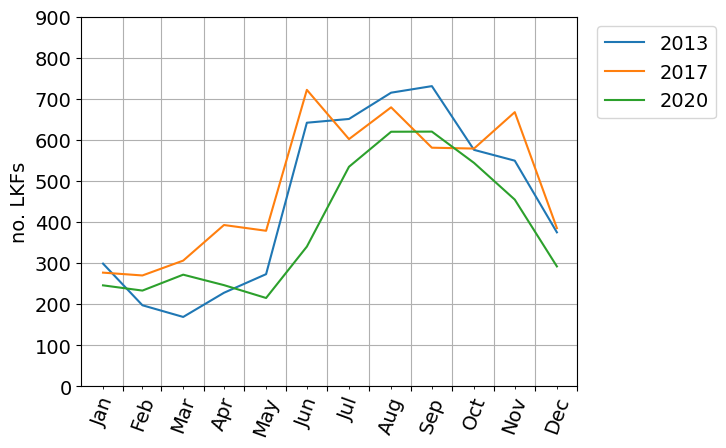

In [10]:
plot(n_lkfs_m[:3], 'no. LKFs', 900)

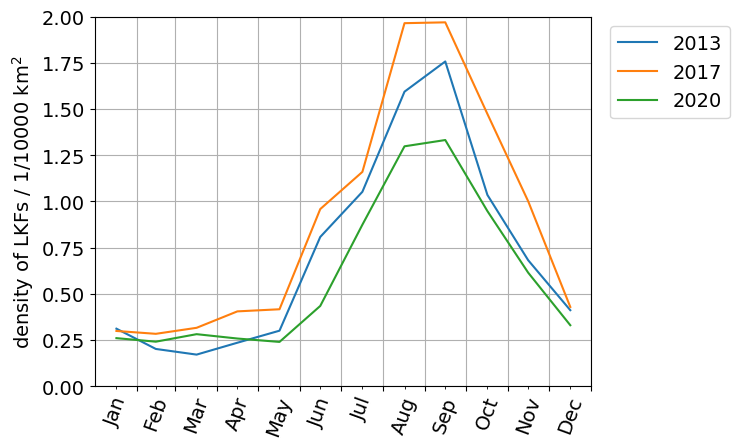

In [11]:
plot(rho_lkfs_m[:3], r'density of LKFs / 1/10000 km$^2$', 2)

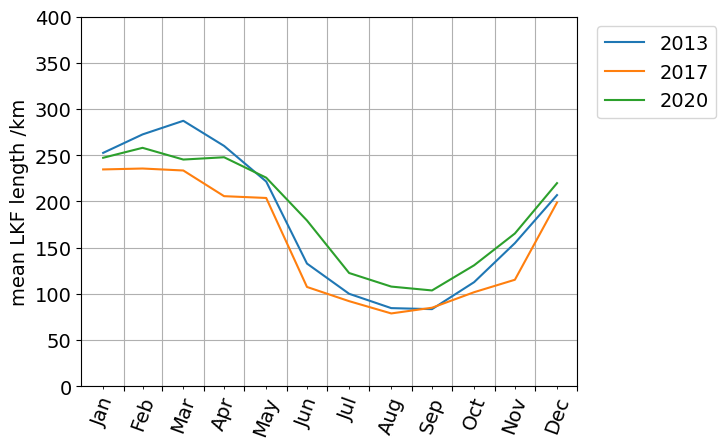

In [12]:
plot(av_length_m[:3], 'mean LKF length /km', 400)

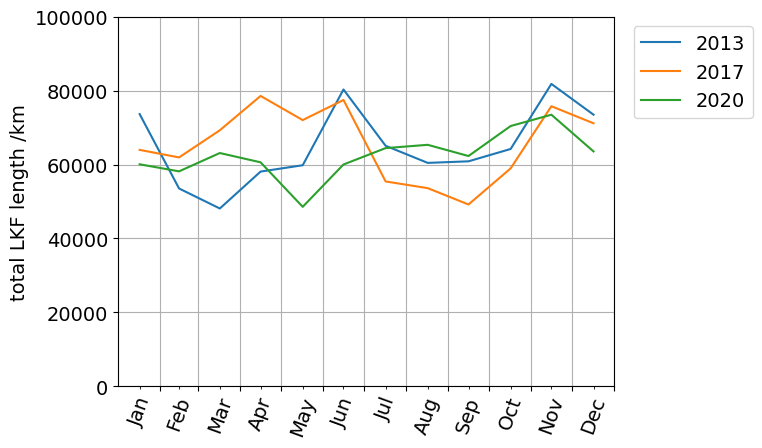

In [13]:
plot(total_length_m[:3], 'total LKF length /km', 100000)